**<font color='red'>Report Submission Information (must be completed before submitting report!)</font>**

* Student 1 Full Name and Number : Yue Chang, 872301
* Student 2 Full Name and Number : Qiushu Chen, 894461
* Workshop day : Wednesday
* Workshop time : 6pm 

# <font color='blue'> Workshop 1 – Optimisation [2 weeks] </font>

## Objectives:

* Learn how to formulate optimisation problems in practice.
* Familiarise yourself with practical software tools used for optimisation.
* Solve optimisation problems using Python Scipy and Matlab.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Another name for the field of “Optimisation” is “Mathematical Optimisation.” As the name indicates optimisation is an area of applied mathematics. It is possible to study optimisation entirely from a mathematical perspective. However, engineers are interested in solving real-world problems in a principled way. Many engineering problems can be and are formulated as optimisation problems. In those cases, mathematical optimisation provides a solid theoretical foundation for solving them in a principled way.

In this workshop, you will learn how to formulate and solve optimisation problems in practice. This will give you a chance to connect theoretical knowledge and practical usage by doing it yourself. You will familiarise yourself with practical optimisation tools for Python. These are chosen completely for educational reasons (simplicity, accessibility, cost). While the underlying mathematics is timeless, optimisation software evolves with time, and can be diverse. Fortunately, once you learn one or two, it should be rather easy to learn others now and in the future, because software designers often try to make it user friendly and take into account what people already know. 

> In the future, you should consider and learn serious optimisation software for scalability and reliability. They can be complex and/or expensive but they get the job done for serious engineering. Teaching such software takes too much time and is beyond the scope of this subject.

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on optimisation.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_


## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: Convex Functions

Remember the definition of convex and concave functions from lecture slides. Functions are mathematical objects but they are used in engineering in very practical ways, for example, to represent the relationship between two quantities. Let's draw a function!

<IPython.core.display.Javascript object>


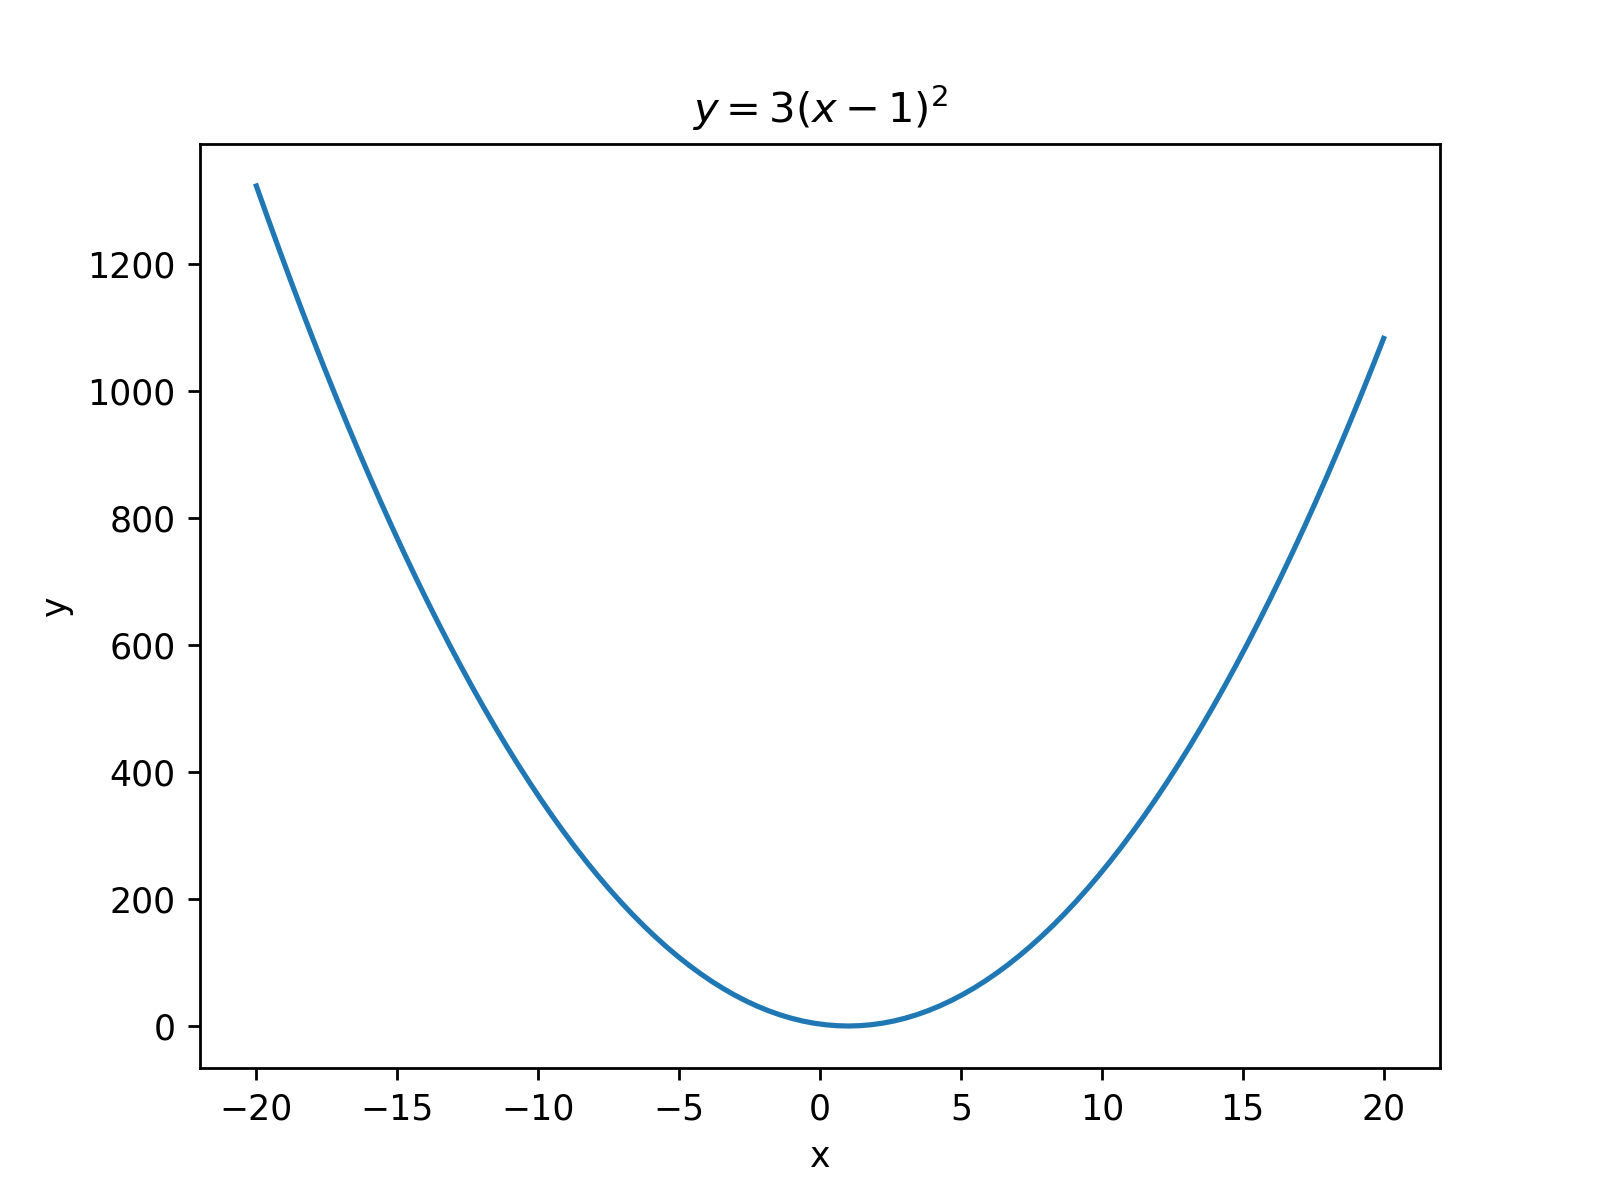

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

# define function f(x)
def f(x):
    return 3*(x-1)**2

# define x and y
x = np.linspace(-20, 20, 100) # 100 equally spaced points on interval [-20,20]
y = f(x) # call function f(x) and set y to the function's return value

# Plot the function y=f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y=3(x-1)^2$')
plt.show()

### Question 1.1. (1 pt)
Plot one concave and one nonconvex functions of your choosing (preferably in 3D). Provide their formulas below.

**A:** We plot one 3D function and one 2D fuction figure above. The 3D functions are:
$$f_1(x,y)=-x^2 - 0.5y^2 \text{(concave);  }f_2(x,y)=\sin(x^2-y^2) \text{(non-convex)}$$
The 2D functions are: $$f_1(x) = -2(x+2)^2\text{(concave);  }f_2(x) = 20\sin(3x^2)+0.1x\text{(non-convex)}$$

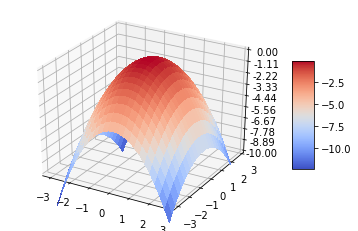

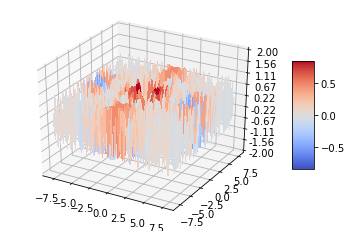

In [21]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection = '3d')

X = np.arange(-3, 3, 0.25) # x axis values
Y = np.arange(-3, 3, 0.25) # y axis values
X, Y = np.meshgrid(X, Y)   # make a grid out of the x and y values
#concave func
Z = -X**2-0.5*(Y**2)  
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.gca(projection = '3d')
X = np.arange(-8, 8, 0.25) # x axis values
Y = np.arange(-8, 8, 0.25) # y axis values
X, Y = np.meshgrid(X, Y)   # make a grid out of the x and y values
#non-convex function
Z = np.sin(X**2 - Y**2)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-2, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

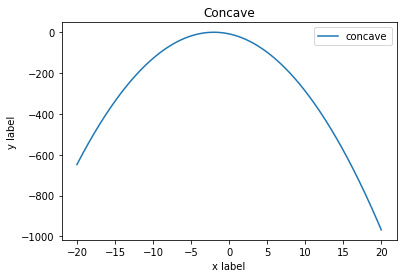

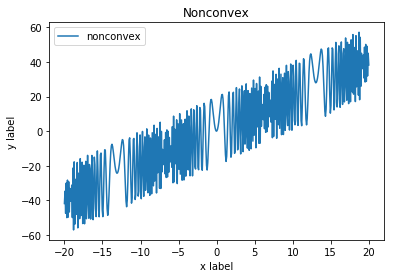

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):#concave function
    return -2*(x+2)**2
def f2(x):#non-convex function
    return 20*(np.sin(3*x**2)+0.1*x)

x = np.linspace(-20, 20, 500)
y = f1(x)
z = f2(x)

fig1 = plt.figure()
plt.plot(x, y, label='concave')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Concave")
plt.legend()
plt.show()

fig2 = plt.figure()
plt.plot(x, z, label='nonconvex')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Nonconvex")
plt.legend()
plt.show()

### Question 1.2. (1 pts)
How would you determine whether a single or multi-variate continuously differentiable function is convex or not? 
> Note that the question becomes very tricky if you have a **parametric** multivariate polynomials of degree four or higher! 

> *[Optional]* An interesting paper (for those who wish to go deeper) http://web.mit.edu/~a_a_a/Public/Publications/convexity_nphard.pdf 

**A:** A real-valued function on an Euclidean space of at least two dimension is convex in its arguments if the line segment between any two points on the graph of the function lies above or on the graph. And there is a necessary condition that the Hessian matrix of this function is semi-positive definite.

### Question 1.3. (2 pts)
Why are convex optimisation problems considered to be easy to solve? Consider optimality conditions of unconstrained functions in your answer. Plot first and second order derivative functions of the concave and non-convex functions you have chosen above (as part of Question 1.1) to further support your argument.

**A:** We use the 2D functions as an example. According to the figures we get below, as the Hessian Matrix of the function of convex or concave functions are semi-positive or semi-negative definite, the first order differencial of the function will have at most one zero. So the global minimum for convex and global maximum for concave is at the zero of first order differencial, which is easy to recognise. If the function is not convex, like the second figure, there are lots of zeros, leading to the difficulty to find out the global minimum or maximum.

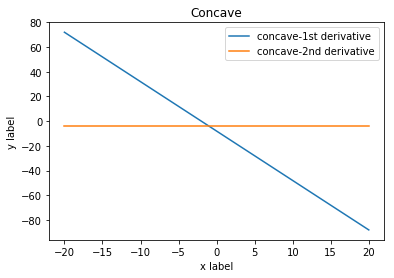

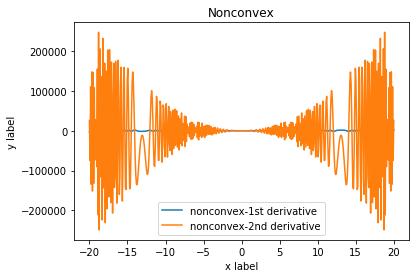

In [23]:
''' Answer as code here '''
import numpy as np
import matplotlib.pyplot as plt
def f1(x):#1st-order derivative of concave function
    return -4*(x+2)
def f2(x):#2nd-order derivative of concave function
    return -4+x-x
def f3(x):#1st-order derivative of nonconvex function
    return 120*x*np.cos(3*x**2)+0.1
def f4(x):#2nd-order derivative of nonconvex function
    return 120*np.cos(3*x**2)-720*x**2*np.sin(3*x**2)

x = np.linspace(-20, 20, 500)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)
y4 = f4(x)
fig1 = plt.figure()
plt.plot(x, y1, label='concave-1st derivative')
plt.plot(x, y2, label='concave-2nd derivative')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Concave")
plt.legend()
plt.show()

fig2 = plt.figure();
plt.plot(x, y3, label='nonconvex-1st derivative')
plt.plot(x, y4, label='nonconvex-2nd derivative')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Nonconvex")
plt.legend()
plt.show()

# Section 2: Unconstrained Optimisation

## 2.1 _Example_. Aloha communication protocol

![Wireless Network](img/wireless.jpg)

**Aloha** is a well-known random access or _MAC_ (Media/multiple Access Control) communication protocol. It enables multiple nodes sharing a broadcast channel without any additional signaling in a distributed manner. Unlike _FDMA_ or _TDMA_ (frequency or time-division multiple access), the channel is not divided into segments beforehand and collisions of packets due to simultaneous transmissions by nodes are allowed. In slotted Aloha, the nodes can only transmit at the beginning of time slots, which are kept by a global/shared clock. See [Aloha](https://en.wikipedia.org/wiki/ALOHAnet#Slotted_ALOHA) for further background information.

### Slotted Aloha Efficiency

For an $N$-node slotted Aloha system, where each node transmits with a probability $p$, the throughput of the system is given by
$$ S(p) = N p (1-p)^{N-1}$$

### Question 2.1. (2 pts)
Formally define the optimisation problem to find the optimal probability $p$ that maximises the throughput. Clearly identify the objective and decision variable(s). Is the objective convex or concave? Show through derivation. 

Note that, there is the constraint $0 \leq p \leq 1$ on probability $p$ but we will ignore it for now.

**A:?** The optimisation problem can be define as:
$$ \max_p S(p) =\max_p N p (1-p)^{N-1} ,$$
where $p \in \mathbb{R}$ and $N \in \mathbb{Z}^+,\;\;$ 
$S(p)$ is the objective function and $p$ is the decision variable.

This function is a quasi-concave function. As we do the differencial of p of the function, we get the first-order differencal: $$\frac{dS}{dp}=N(1-p)^{N-2}(1-Np) $$ and the second-order differencial$$\frac{d^2S}{dp^2}=N(N-1)(1-p)^{N-3}(Np-2)$$
specially, when $N\leq2$, the second-order differencial is always below 0, so the function is concave; when $N\geq3$, the second-order differencial is below 0 when $p\leq\frac{2}{N}$, the function is concave; and above 0 when $p\geq\frac{2}{N}$, the function is convex.
And in this function, $\forall 0\leq x \leq 1\text{we have }f(x)\geq f(0)\text{and }f(x)\geq f(1)$, which means that every superlevel set is convex, so the objective function is a quasi-concave function.

### Question 2.2. (2 pts)
Plot the performance function and its derivative for $N=10$ nodes. Is the objective function convex or concave? Determine using mathematical methods. Investigate the property of the derivative function of the objective. What do you call such functions?

**A:** From previous question we know that when $N=10$, the 2nd order derivative of objective function is $$\frac{d^2S}{dp^2}=90(1-p)^{7}(10p-2)$$
So the 2nd-order derivative is below zero on interval $p\in[0,0.2]$, above zero on interval $p\in[0.2,1]$, also$\forall 0\leq p \leq 1\text{we have }f(p)\geq f(0)\text{and }f(p)\geq f(1)$, which means that every superlevel set is convex, so the objective function is a quasi-concave function. 

Looking the plot of derivative function of the objective, we can see that all the sublevel sets are convex, so it is a quasi-convex function.

**Note:** In order to show both objective function and derivative function clearly in one picture, the derivative function is scaled by $0.1$.

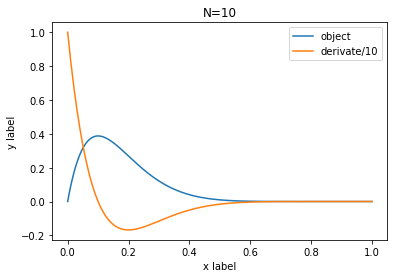

In [24]:
''' Answer as code here '''
import numpy as np
import matplotlib.pyplot as plt

def f1(x):#objective func
    return 10*x*(1-x)**9
def f2(x):#1st-order derivative
    return 10*(1-x)**9 - 90*x*((1-x)**8)
x = np.linspace(0,1,200)
y1 = f1(x)
y2 = f2(x)
r = y2/10
plt.plot(x, y1, label='object')
plt.plot(x, r, label='derivate/10')
fig.set_size_inches(16, 8)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("N=10")
plt.legend()
plt.show()

### Question 2.3. (2 pts)
Find the optimal probability $p$ for $N=10$ nodes. Use an appropriate package from [Scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html). Cross-check your answer with a mathematical formula that you should derive by hand. 

**A:** From previous question we know when $N=10$ the 1-st order derivative of the objective function is $$\frac{dS}{dp}=10(1-p)^{8}(1-10p) $$
So we can solve the stationary point is $p=0.1$, and we also know $S^{''}(p=0.1) < 0$, thus at $p=0.1$ we have the local maximum. By using Scipy, we can verify the optimal solution is $p=0.1$

optimal_p= [0.1]


(0, 1)

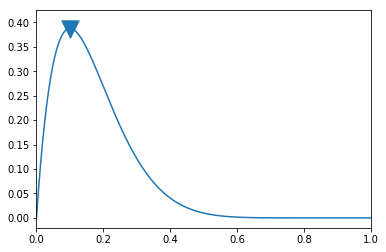

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
def s(x):
    return (-1)*10*x*(1-x)**9
x = np.linspace(0., 1., 1000)
y = s(x)
x0 = 1
#we choose to use basinhopping which is a function to find global min in Scipy
xmin = optimize.basinhopping(s,x0,stepsize = 5).x
plt.plot(x, -y)
plt.scatter(xmin, -s(xmin), marker='v', s=300)
fig.set_size_inches(16, 8)
print('optimal_p=',xmin)
plt.xlim(0, 1)

## 2.2 Gradient Descent Algorithms

### Question 2.4. (10 pts)
Write your own gradient algorithm (with constant step size) to solve the problem
$$ \max_x x^T Q x + r^T x,$$
where $x,\, r \in \mathbb{R}^2$ and $Q$ is a $2\times 2$ positive definite matrix of your choice. Cross-check your answers using one of the standard optimisation packages, e.g. scipy or cvxpy.

1. If Q is positive definite, then what type of optimisation problem is this? Give your answer using mathematical tools learned in classroom. Would anything change if $Q$ were not positive definite? Plot both cases and comment. 
2. Focusing on positive definite $Q$, what happens if you choose your fixed step size too large or too small? Observe and comment.
3. Choose $Q$ in such a way that is has a low [condition number] (https://www.encyclopediaofmath.org/index.php/Condition_number), [see also.](https://calculus.subwiki.org/wiki/Gradient_descent_with_constant_learning_rate_for_a_quadratic_function_of_multiple_variables) Next, choose a $Q$ with a high condition number. Compare the performance of your algorithm in both cases, and comment.  
4. Now, solve both versions of the problem using (b) diminishing step size (c) Armijo rule/wolf test (line search). Discuss stopping criteria for all variants. 
5. Plot your trajectories clearly showing the iterations of the gradient algorithm. You should also show either by displaying the level sets of the objective or the objective function itself (if resorting to a 3D plot). 

**Answers are here**

1. If Q is positive definite, then what type of optimisation problem is this? Give your answer using mathematical tools learned in classroom. Would anything change if  𝑄  were not positive definite? Plot both cases and comment.

**A:** If $Q$ is pos-definite, the problem is convex optimisation. Because we can see the objective function is a quadratic function, from what we learned in class we know that the Hessian for this function is $Q$+$Q^T$, which means that the Hessian is pos-definite, so this is a covex optimisation problem. If $Q$ is not positive definite, then the problem is not a covex problem.

**Comment:** From the plot we can see that for $Q$ pos-definite case, the function doesn't have any local minimum except for a global minimum. And when $Q$ is not pos-definite, the function has multiple local minimums and it will be harder to find the global minimum. In a word, convex optimisation is much easier than non-convex optimisation.

**Note:** The follow question we choose:
$Q=
 \begin{bmatrix}
   2 & 0 \\
   1 & 2 
  \end{bmatrix}\text{for pos-definite,}\;
 Q=
 \begin{bmatrix}
   -2 & 0 \\
   -1 & 2 
  \end{bmatrix}\text{for not pos-definite,}\;
r^T=
 \begin{bmatrix}
   3 & -10
  \end{bmatrix}
$

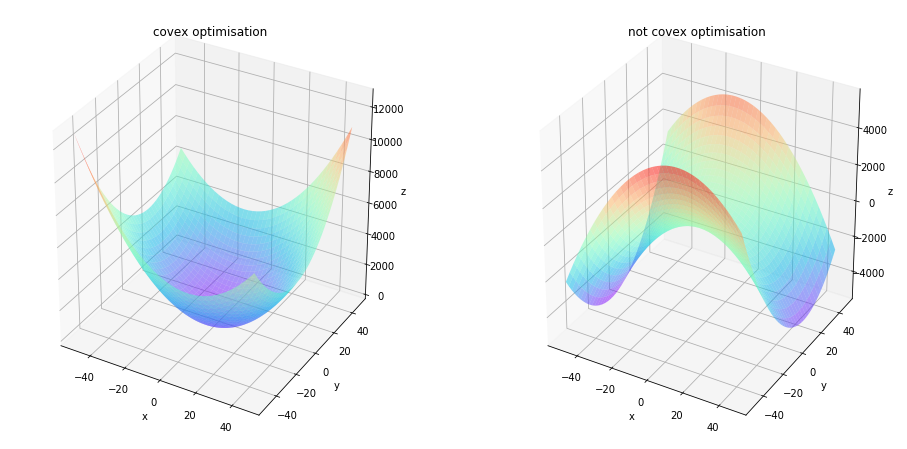

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def Fun(x,y):#objective
    return 2 * x ** 2 + 2 * y ** 2 + 3 * x - 10 * y + x * y
def Fun1(x,y):# not pos-definite    objective
    return -2 * x ** 2 + 2 * y ** 2 + 3 * x - 10 * y - x * y
#plot
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
X = np.arange(-50, 50, 2.5) # x axis values
Y = np.arange(-50, 50, 2.5) # y axis values
X, Y = np.meshgrid(X, Y)   # make a grid out of the x and y values
Z=Fun(X,Y)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
plt.title('covex optimisation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122, projection='3d')
Z1=Fun1(X,Y)
ax.plot_surface(X,Y,Z1,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
plt.title('not covex optimisation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.set_size_inches(16, 8)
plt.show()

2. Focusing on positive definite $Q$, what happens if you choose your fixed step size too large or too small? Observe and comment.

**A:** From the plot we can see that when the step size is too large, although we can get the solution faster, but the trajectories are bumpy, and if we keep increasing the step size, it will diverge or overstep the solution and we will never find the solution. If we lower the step size, it will takes longer to find the solution, but the path will fit the objective surface more closely, which means that we have a lower chance to overstep the optimal point.

============================constant step================================
===========================stepsize=0.08==================================
iteration =  26
solution = (-1.4649678266644783, 2.86491426400183, -16.53332439644017)
=============================stepsize=0.2=================================
iteration =  9
solution = (-1.466098688, 2.866098688, -16.533332365534037)
============================stepsize=0.4===================================
iteration =  6
solution = (-17.16652800000001, -12.833472000000008, 1215.9166667243535)


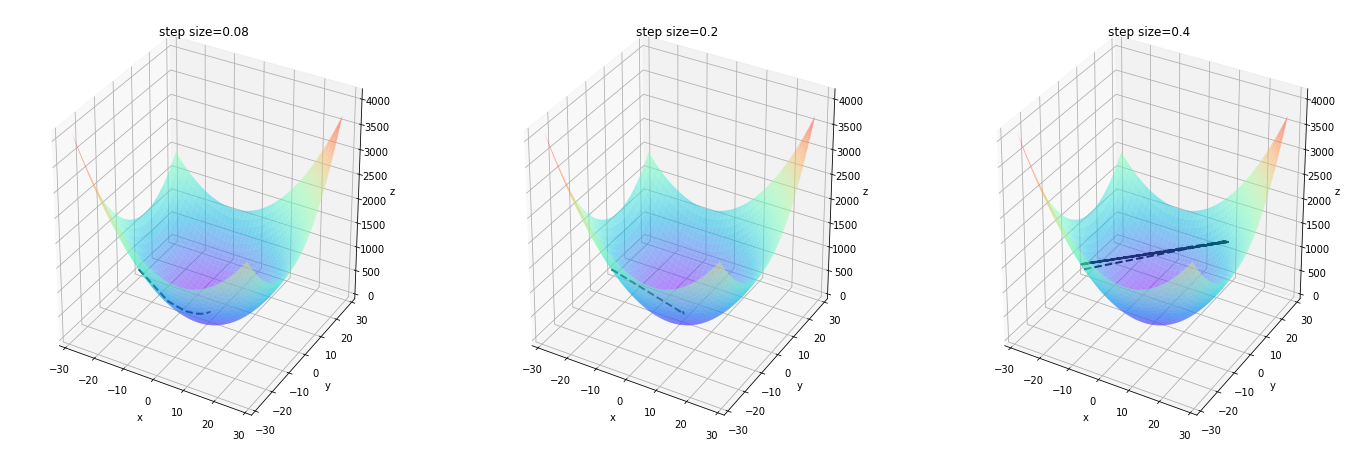

In [26]:
def Fun(x):#objective
    return 2 * x[0] ** 2 + 2 * x[1] ** 2 + 3 * x[0] - 10 * x[1] + x[0] * x[1]
def PxFun(x):#gradient
    return [(4*x[0]+3+x[1]), (4*x[1]-10+x[0])]

def constant_step(f,dx,step,x0):    
    '''
    This function take the objective function 'f', its gradient function 'dx', 
    the step 'size step', and starting point 'x0'
    Return iteration,solution,and lists for plot
    '''    
    x=x0
    tag_x=[x0[0]]
    tag_y=[x0[1]]
    tag_z=[f(x0)]
    #next step
    new_x=x0
    #flag for stop
    Over=False
    #count iterations
    iteration = 0
    #loop until meet stopping criterion
    while Over==False:
    #gradient descent
        new_x = x - np.dot(step,dx(x))
    #set stop flag,use objective func itself as descent func 
        if np.abs(Fun(x)-Fun(new_x))<1e-5:
            Over=True   
    #update next step
        x=new_x
        iteration += 1  
    #record points for tranjectory plot
        tag_x.append(x[0])
        tag_y.append(x[1])
        tag_z.append(f(x))
    solution =(tag_x[-1],tag_y[-1],tag_z[-1])
    return iteration,solution,tag_x,tag_y,tag_z
print("============================constant step================================")
print("===========================stepsize=0.08==================================")
iteration,solution,tag_x,tag_y,tag_z = constant_step(Fun,PxFun,0.08,[-15,-15])
print("iteration = ",iteration)
print("solution =",solution)
print("=============================stepsize=0.2=================================")
iteration1,solution1,tag_x1,tag_y1,tag_z1 = constant_step(Fun,PxFun,0.2,[-15,-15])
print("iteration = ",iteration1)
print("solution =",solution1)
print("============================stepsize=0.4===================================")
iteration2,solution2,tag_x2,tag_y2,tag_z2 = constant_step(Fun,PxFun,0.4,[-15,-15])
print("iteration = ",iteration2)
print("solution =",solution2)

# =============================================================================
# 
# #plot
# 
# =============================================================================
fig=plt.figure()
ax = fig.add_subplot(131, projection='3d')
X,Y=np.mgrid[-28:28:40j,-28:28:40j]
Z=Fun([X,Y])
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x,tag_y,tag_z,'k--', linewidth=2)
plt.title('step size=0.08')
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x1,tag_y1,tag_z1,'k--', linewidth=2)
plt.title('step size=0.2')
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x2,tag_y2,tag_z2,'k--', linewidth=2)
plt.title('step size=0.4')
fig.set_size_inches(24,8)
plt.show()

3. Choose $Q$ in such a way that is has a low [condition number]  Next, choose a $Q$ with a high condition number. Compare the performance of your algorithm in both cases, and comment. 

**Comment:** From the plots below we can see that with the same chosen step size and starting point, when condition number is small, we can it takes less iterations to find the optimal, but if we choose a large condition number, we can see it takes more tries to get the solution, which matches what we learned from the lecture that if condition number is small convergence is fast, if it is large (ill-conditioned), convergence will be slow!

**Note:** The follow question we choose:
$Q=
 \begin{bmatrix}
   2 & 0 \\
   1 & 2 
  \end{bmatrix}\text{for small condition number=1,}\;
 Q=
 \begin{bmatrix}
   10 & 0 \\
   0.1 & 0.2 
  \end{bmatrix}\text{for large condition number=50,}\;
r^T=
 \begin{bmatrix}
   3 & -10
  \end{bmatrix}
$

============================constant step=================================
==========================small condition number 1=========================
iteration =  208
solution = (-1.460455604805853, 2.8582797448604333, -16.53316758952985)
==========================large condition number 50==========================
iteration =  3908
solution = (-0.2753440230053275, 25.068805229143187, -125.75719649542981)


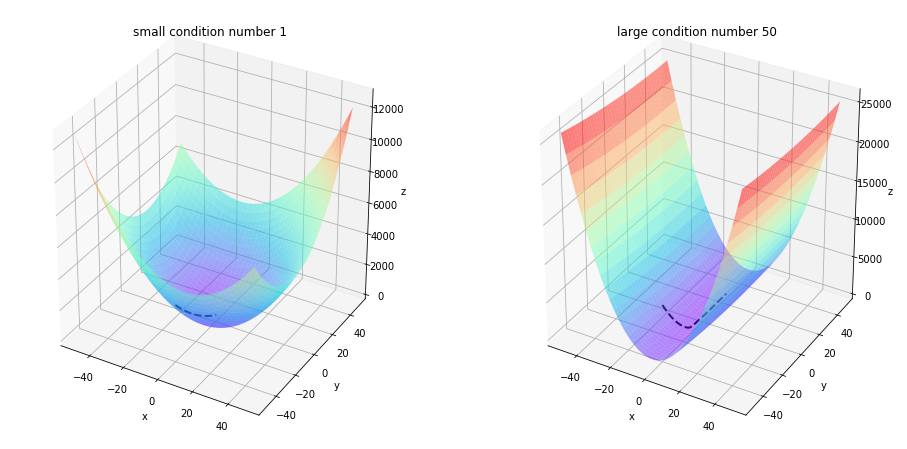

In [28]:
#small condition number=1
def Fun(x):#objective
    return 2 * x[0] ** 2 + 2 * x[1] ** 2 + 3 * x[0] - 10 * x[1] + x[0] * x[1]
def PxFun(x):#gradient
    return [(4*x[0]+3+x[1]), (4*x[1]-10+x[0])]

# large condition number=50
def Fun1(x):#objective
    return 10 * x[0] ** 2 + 0.2 * x[1] ** 2 + 3 * x[0] - 10 * x[1] +  0.1*x[0] * x[1]
def PxFun1(x):#gradient
    return [(20 * x[0] + 3 +  0.1*x[1]),(0.4* x[1] - 10 + 0.1*x[0])]

print("============================constant step=================================")
print("==========================small condition number 1=========================")
iteration,solution,tag_x,tag_y,tag_z = constant_step(Fun,PxFun,0.009,[-15,-15])
print("iteration = ",iteration)
print("solution =",solution)
print("==========================large condition number 50==========================")
iteration1,solution1,tag_x1,tag_y1,tag_z1 = constant_step(Fun1,PxFun1,0.009,[-15,-15])
print("iteration = ",iteration1)
print("solution =",solution1)
# =============================================================================
# 
# #plot
# 
# =============================================================================
fig=plt.figure()
ax = fig.add_subplot(121, projection='3d')
X,Y=np.mgrid[-50:50:40j,-50:50:40j]
Z=Fun([X,Y])
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x,tag_y,tag_z,'k--', linewidth=2)
plt.title('small condition number 1')
ax = fig.add_subplot(122, projection='3d')
Z1=Fun1([X,Y])
ax.plot_surface(X,Y,Z1,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x1,tag_y1,tag_z1,'k--', linewidth=2)
plt.title('large condition number 50')
fig.set_size_inches(16, 8)
plt.show()

4. Now, solve both versions of the problem using (b) diminishing step size (c) Armijo rule/wolf test (line search). Discuss stopping criteria for all variants. 

**A:** 

b) the stopping criteria for minimizing is when objective function's value difference between this step and next step is smaller than $1\times10^-5$

c) the stopping criteria for ending the best step size for kth step search is armijo rule combining wolfe test. The stopping criteria for line search is when the norm of gradient is smaller than $1\times10^-5$.

**Comment:** 
We can see that with the same chosen objective func, the performance difference of small condition number and large condition number of diminishing step is more obvious than the constant step method. However, the line search works pretty well for both small condition number and large condition number in this case.

===========================diminishing step==============================
========================small condition number 1============================
iteration =  6
solution = (-1.4666666666666666, 2.8666666666666667, -16.53333333333333)
=========================large condition number 50===========================
iteration =  619393
solution = (-0.27445706527798625, 24.894956989407582, -125.75115726576246)


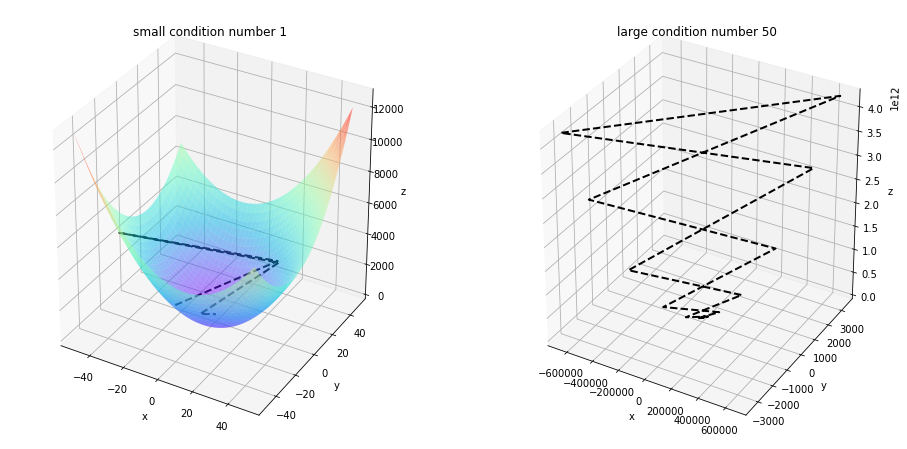

In [29]:
def diminishing_step(f,dx,x0):    
    '''
    This function take the objective function 'f', its gradient function 'dx', 
    the step 'size step', and starting point 'x0'
    Return iteration,solution,and lists for plot
    '''
    step = 0.5
    x=x0
    tag_x=[x0[0]]
    tag_y=[x0[1]]
    tag_z=[f(x0)]
    #next step
    new_x=x0
    #flag for stop
    Over=False
    #count iterations
    iteration = 0
    #loop until meet stopping criterion
    while Over==False:
    #gradient descent
        new_x = x - np.dot(step,dx(x))
    #set stop flag 
        if np.abs(Fun(x)-Fun(new_x))<1e-5:
            Over=True   
    #update next step
        x=new_x
        iteration += 1
    #diminishing step
        step = 1/(iteration+1) 
    #record points for tranjectory plot
        tag_x.append(x[0])
        tag_y.append(x[1])
        tag_z.append(f(x))
    solution =(tag_x[-1],tag_y[-1],tag_z[-1])
    return iteration,solution,tag_x,tag_y,tag_z
print("===========================diminishing step==============================")
print("========================small condition number 1============================")
iteration,solution,tag_x,tag_y,tag_z = diminishing_step(Fun,PxFun,[-15,-15])
print("iteration = ",iteration)
print("solution =",solution)
print("=========================large condition number 50===========================")
iteration1,solution1,tag_x1,tag_y1,tag_z1 = diminishing_step(Fun1,PxFun1,[-15,-15])
print("iteration = ",iteration1)
print("solution =",solution1)
# =============================================================================
# 
# #plot
# 
# =============================================================================
fig=plt.figure()
ax = fig.add_subplot(121, projection='3d')
X,Y=np.mgrid[-50:50:40j,-50:50:40j]
Z=Fun([X,Y])
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x,tag_y,tag_z,'k--', linewidth=2)
plt.title('small condition number 1')
ax = fig.add_subplot(122, projection='3d')
Z1=Fun([X,Y])
ax.plot_surface(X,Y,Z1,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(tag_x1,tag_y1,tag_z1,'k--', linewidth=2)
plt.title('large condition number 50')
fig.set_size_inches(16, 8)
plt.show()

=================wolfe test(line search)=========================
=================small condition number 1========================
iteration 34
solution [-1.467  2.867] -16.53333333332465
==================large condition number 50=======================
iteration 175
solution [-0.275 25.069] -125.75719649552111


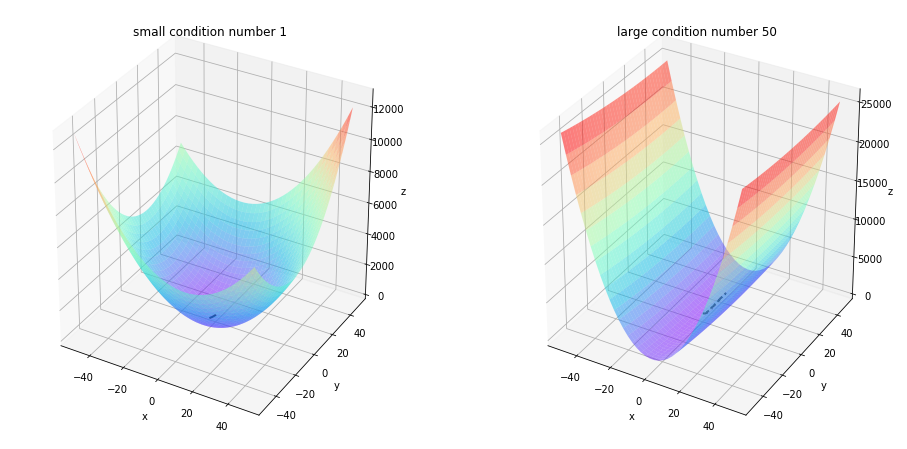

In [39]:
#gradient func(in array) for small condition number=1
def gfun(x):
    return np.array([4*x[0]+3+x[1], 4*x[1]-10+x[0]])
#gradient func(in array) for large condition number=50
def gfun1(x):
    return np.array([20*x[0]+3+0.1*x[1], 0.4*x[1]-10+0.1*x[0]])
def Wolfesearch(f,df,x,alpham,c1,c2,t): 
    '''
    This function use armijo rule and wolfe test to find the best step size for each iteration 
    f is objective func, df is gradient func, x is current step, alpham is the upper bound for step search,
    c1 c2 are parameters for armijo and wolfe rule and 0<c1<<c2<1, t is a scalar for step size search
    '''
    a = 0
    b = alpham
    #define the initial step size
    alpha = 0.03
    flag = 0
    while flag == 0:
        #only when both armijo rule and wolfe test are met, end the loop
        if f(x - alpha * df(x)) <= f(x) + (c1 * alpha * np.dot(df(x), df(x))): #Armijo rule                 
            if np.abs(np.dot(df(x-alpha*df(x)),df(x))) <= np.abs(c2*np.dot(df(x), df(x))): #Wolfe test       
                flag = 1
            #apply the idea of binary search to quickly find the desired step size
            else:
                a = alpha                
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            b = alpha
            alpha = (a + b) / 2
    return alpha
def line_search(fun,gfun,x0):
    '''
    This function use line search to find the optimal solution which uses norm of gradient as stopping 
    criteria use armijo rule and wolfe test to find the best step size for each iteration ,fun is objective 
    func, gfun is gradient func, x0 is initial step
    '''
    #declare variables
    c1 = 0.1 #parameter for armijo rule
    c2 = 0.75 #parameter for wolfe test
    k = 0 #record for iteration
    epsilon = 1e-5 #define the accuracy of search
    W = np.zeros((2, 20000)) #list to store trajectories for plot
    Over = 0 #flag for loop
    while Over==False:
            #record trajectory
            W[:, k] = x0 
            #gradient
            gk = gfun(x0)
            #use norm of gradient as stopping criteria
            if np.linalg.norm(gk) < epsilon:
                Over = True
                break
            #call function to return the 'best' step for this iteration
            alpha=Wolfesearch(fun,gfun,x0,1,c1,c2,2)
            #update new step
            x0-=alpha*gk
            k += 1
    W = W[:, 0:k+1]  #record trajectories
    return [x0, fun(x0), k,W]

print("=================wolfe test(line search)=========================")
print("=================small condition number 1========================")
x0 = np.array([-2.5, -2])
result=line_search(Fun,gfun,x0)
print('iteration',result[2])
print('solution',result[0],result[1])
W=result[3]
print("==================large condition number 50=======================")
result1=line_search(Fun1,gfun1,x0)
print('iteration',result1[2])
print('solution',result1[0],result1[1])
W1=result1[3]
# =============================================================================
# 
# #plot
# 
# =============================================================================
X1 = np.arange(-3, 1.5 + 0.05, 0.05)
X2 = np.arange(-3.5, 6 + 0.05, 0.05)
fig=plt.figure()
ax = fig.add_subplot(121, projection='3d')
Z=Fun([X,Y])
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.plot(W[0, :], W[1, :],'k--', linewidth=2)
plt.title('small condition number 1')
ax = fig.add_subplot(122, projection='3d')
Z1=Fun1([X,Y])
ax.plot_surface(X,Y,Z1,rstride=1,cstride=1,cmap="rainbow",alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')    
ax.plot(W1[0, :], W1[1, :],'k--', linewidth=2)
plt.title('large condition number 50')
fig.set_size_inches(16, 8)
plt.show()

In [1]:
'''code for verifying optimisation solution using cvxpy, 
we can see that our solutions match!'''
import cvxpy as cp
import numpy as np
x = cp.Variable()
y = cp.Variable()
#check when small conditon number=1
obj1 = cp.Minimize(2*cp.square(x+0.25*y) + 1.875*cp.square(y) + 3*x - 10*y)
cons1 = [-30 <= x, x <= 30, -30 <= y, y <= 30]
prob1 = cp.Problem(obj1,cons1)
prob1.solve()
print("=================cvxpy solution check=========================")
print("small condition number=1,Optimal value: ", prob1.value)
print("x: ", x.value)
print("y: ", y.value)
#check when large condition number=50
x = cp.Variable()
y = cp.Variable()
obj3 = cp.Minimize(10*cp.square(x+0.005*y) + 0.19975*cp.square(y) + 3*x - 10*y)
cons3 = [-30 <= x, x <= 30, -30 <= y, y <= 30]
prob3 = cp.Problem(obj3,cons3)
prob3.solve()
print("large condition number=50 Optimal value: ", prob3.value)
print("x: ", x.value)
print("y: ", y.value)

=================cvxpy solution check=========================
small condition number=1,Optimal value:  -16.533333333333328
x:  -1.4666666666666666
y:  2.8666666666666667
large condition number=50 Optimal value:  -125.7571964956195
x:  -0.27534418022528157
y:  25.06883604505632


###  Question 2.5. (2 pts)
Choose one of the versions of the problem and algorithms in **Question 2.4** that finds the correct solution.

1. Use objective function itself or a norm of its gradient as a descent (Lyapunov) function that establishes the convergence of the solution algorithm $A(x)$. Plot the value of the chosen descent function versus the trajectory or steps.
2. Calculate and plot $||x(n)-x^*||$ over iterations $n=0,\ldots$, to establish that your solution algorithm leads to a pseudo-contraction.


1. Use objective function itself or a norm of its gradient as a descent (Lyapunov) function that establishes the convergence of the solution algorithm $A(x)$. Plot the value of the chosen descent function versus the trajectory or steps.

**A:** From the plot below and the printed list, we can see that the value of the descent function which in this case is the objective function itself is decreasing vs. step, which means that our each step's value converge to the solution.

=========================descent func vs. steps===============================
iteration =  99
solution = (-1.4623936020357708, 2.861466904341248, -16.533264959034653)


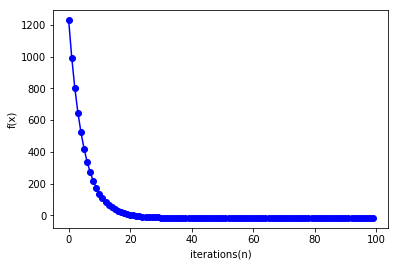

In [30]:
print("=========================descent func vs. steps===============================")
#choose constant step algorithm form question 2.4
iteration,solution,tag_x,tag_y,tag_z = constant_step(Fun,PxFun,0.02,[-15,-15])
print("iteration = ",iteration)
print("solution =",solution)
# =============================================================================
# 
# #plot
# 
# =============================================================================
from matplotlib.pyplot import figure,plot, show, xlabel, ylabel
figure();
xlabel('iterations(n)'); ylabel('f(x)')
plot(tag_z, 'bo-') 
show()


2. Calculate and plot $||x(n)-x^*||$ over iterations $n=0,\ldots$, to establish that your solution algorithm leads to a pseudo-contraction.

**A:** From the plot below, we can see that $||x(n)-x*||$ has a decreasing trend, which can also be shown by the alpha plot. Because from lecture slides module 2 lesson 1 page 51, we can see the formula $$||T(x)-x*|| \leq \alpha||x-x*||$$           
where $\alpha\in[0,1)$
Thus, from our plot we can see $\alpha$ always smaller than 1, which meet the formula so our algorithm leads to a pseudo-contraction.

===========================pseudo-contraction===============================
iteration =  99
solution = (-1.4623936020357708, 2.861466904341248, -16.533264959034653)


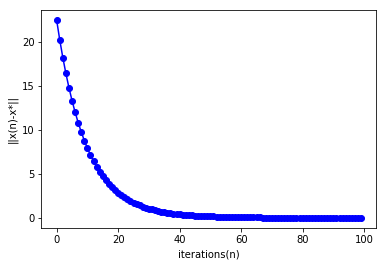

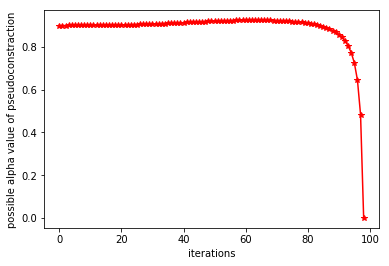

In [31]:
print("===========================pseudo-contraction===============================")
#choose constant step algorithm form question 2.4
iteration,solution,tag_x,tag_y,tag_z = constant_step(Fun,PxFun,0.02,[-15,-15])
print("iteration = ",iteration)
print("solution =",solution)

#compute||x(n)-x*||
tag_x_norm = [np.sqrt((tag_x[i]-solution[0])**2 + (tag_y[i]-solution[1])**2) for i in range(len(tag_x))]
#compute alpha = (||x(k+1)-x*||)/(||x(k)-x*||) to show pseudo-contraction
alpha = [tag_x_norm[i+1]/tag_x_norm[i] for i in range(len(tag_x)-1)]
# =============================================================================
# 
# #plot
# 
# =============================================================================
from matplotlib.pyplot import figure,plot, show, xlabel, ylabel
figure(); 
xlabel('iterations(n)'); ylabel('||x(n)-x*||')
plot(tag_x_norm, 'bo-')
figure(); 
plot(alpha, 'r*-')
xlabel('iterations'); ylabel('possible alpha value of pseudoconstraction')
show()


# Section 3: Constrained Optimisation

## 3.1 _Example_. Waterfilling in Communications

_by Robert Gowers, Roger Hill, Sami Al-Izzi, Timothy Pollington and Keith Briggs.
From the book by Boyd and Vandenberghe, Convex Optimization, Example 5.2 page 245._

$$\min_{x} \sum_{i=1}^N -\log(\alpha_i + x_i)$$ 

$$\text{subject to } x_i \geq 0, \; \forall i, \text{ and } \sum_{i=1}^N x_i = P $$

This problem arises in information/communication theory, in allocating power to a
set of $n$ communication channels. The variable $x_i$ represents the transmitter power
allocated to the _i-th_ channel, and $\log(\alpha_i + x_i)$ gives the capacity or communication rate of the channel, where $\alpha_i>0$ represents the floor above the baseline at which power can be added to the channel. The problem is to allocate a total power of one to the channels,
in order to maximize the total communication rate.

This can be solved using a classic [water filling algorithm](https://en.wikipedia.org/wiki/Water_filling_algorithm). 

![Waterfilling](img/waterfill.jpg)


###  Question 3.1. (4 pts)

1. (1 pt) Is the problem in Example 3.1 convex? Formally explain/argue why or why not. What does this imply regarding the solution? 
2. (2 pts) Solve the problem above for $N=8$ and a randomly chosen $\alpha$ vector. You can use for example _Cvxpy_ package. Cross-check your answer with another software (package), e.g. Matlab or Scipy. 
3. (1 pt) Write the Lagrangian, KKT conditions, and find numerically the Lagrange multipliers associated with the solution (using the software package/function). Which constraints are active? Explain and discuss briefly. 

1. (1 pt) Is the problem in Example 3.1 convex? Formally explain/argue why or why not. What does this imply regarding the solution? 

**A:** The problem in Example 3.1 is convex. The objective function $ \sum_{i=1}^N -\log(\alpha_i + x_i)$ has a positive second-order derivative $\cfrac{1}{(a_i+x_i)^2}$,which means that the Hessian is positive definite, so the objective function is convex. Also, the constraint sets $x_i\geq0 \;\text{and} \sum_{i=1}^N x_i = P$ are also convex. So the optimisation problem is convex, which means that the function doesn't have any local minimum except for a global minimum.

2. (2 pts) Solve the problem above for $N=8$ and a randomly chosen $\alpha$ vector. You can use for example _Cvxpy_ package. Cross-check your answer with another software (package), e.g. Matlab or Scipy. 

**Comment:**  From the result below, we can see that the solution of cvxpy matches scipy.

In [18]:
import numpy as np
import cvxpy as cp
def water_filling(n, a, sum_x):    
    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a
    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(cp.log(alpha + x)))
    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - sum_x == 0]
    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value,constraints
    else:
        return prob.status, np.nan, np.nan
# As an example, we will solve the water filling problem with 8 buckets
np.set_printoptions(precision=3)
P = 1
buckets = 8
# randomly choose alpha
a = np.random.uniform(0,1.5,buckets)
stat, prob, x,constraints = water_filling(buckets, a,P)
print('The chosen alpha:',a)
print('Chosen P = ',P)
print('min_f(x)= {:.4g} '.format(-prob))
print('solution_x=:\n{}'.format(x))

The chosen alpha: [1.465 1.352 1.164 0.512 0.652 1.247 1.433 0.684]
Chosen P =  1
min_f(x)= -1.261 
solution_x=:
[7.907e-10 9.886e-10 1.772e-09 4.374e-01 2.975e-01 1.307e-09 8.373e-10
 2.651e-01]


In [19]:
'''checking the result using scipy'''
from scipy import optimize as opt
obj = lambda xm: -1*np.sum(np.log(xm+a))
cons1 = [{'type': 'ineq', 'fun': lambda xm: xm}]
cons2 = [{'type': 'eq', 'fun': lambda xm: -1*np.sum(xm) + P}]
cons1.extend(cons2)
x0 = np.ones((1,8))/8
sol = opt.minimize(obj,x0,constraints=cons1)
print(sol)

     fun: -1.2606431269263396
     jac: array([-0.683, -0.739, -0.859, -1.054, -1.052, -0.802, -0.698, -1.053])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 1.744e-16, -8.004e-17, -1.259e-16,  4.374e-01,  2.975e-01,
        6.263e-17,  1.765e-17,  2.651e-01])


3. (1 pt) Write the Lagrangian, KKT conditions, and find numerically the Lagrange multipliers associated with the solution (using the software package/function). Which constraints are active? Explain and discuss briefly.

**A:**  The Lagrangian is: 
$$ L(x,\lambda,\mu) = \sum_{i=1}^N -\log(\alpha_i + x_i)+ \mu^Tx + \lambda(\sum_{i=1}^Nx_i-P) \;\;\;(\forall i)$$
and suppose x* is the relative minimum point for f(x) and a regular point for the constraints, the KKT conditions are ($\forall i$):
- $\nabla(\sum_{i=1}^N -\log(\alpha_i + x_i^*))+\mu^T\nabla(x^*)+\lambda\nabla(\sum_{i=1}^Nx_i^*-P)=0$ ,which equals to $\cfrac{-1}{\alpha_i + x_i^*}+\lambda+\mu_i=0$
- $\mu^T(x^*)=0 $
- $\mu\geq0$
- $ x_i \geq 0$
- $\sum_{i=1}^N x_i = P $

Because constranits $x_j\geq 0\;,where j=1,2,3,6,7$ have non-zero Lagrangian multipliers, so they are active inequality constraints. And the equality constraint is always active.

In [20]:
print("Lagrangian multiplier for inequality:",constraints[0].dual_value)
print("Lagrangian multiplier for equality:",constraints[1].dual_value)

Lagrangian multiplier for inequality: [3.704e-01 3.138e-01 1.945e-01 1.131e-09 1.735e-09 2.513e-01 3.554e-01
 1.942e-09]
Lagrangian multiplier for equality: 1.0532410710468116


## 3.2 _Example_. Economic Dispatch in Power Generation

The problem is formulated as
$$ \min_P \sum_{i=1}^N c_i P_i $$
$$\text{subject to } P_{i,max} \geq P_i \geq 0, \; \forall i, \text{ and } \sum_{i=1}^N P_i = P_{demand} $$

Here, $P_1,\ldots P_N$ are the power generated by Generators $1,\ldots,N$, $c_i$ is the per-unit generation cost of the i-_th_ generator, and $P_{demand}$ is the instantaneous power demand that needs to be satisfied by aggregate generation. More complex formulations take into account transmission, generator ramp-up and down constraints, and reactive power among other things.

### Question 3.2. (4 pts)

Let us get inspired from generation in Victoria with $N=12$ biggest generators that have more than 200MW capacity. Choose their maximum generation randomly or from the Victoria generator report if you wish to be more realistic. Generate a random cost vector $c$ varying between $10-50$ AUD per MWh. _(Optionally, you can search and find how much different generation types cost if you are interested)._ Let the demand be $P_{demand}=5000MW$. 

Solve this simplified [economic dispatch](https://en.wikipedia.org/wiki/Economic_dispatch) problem defined above. The resulting [merit order](https://en.wikipedia.org/wiki/Merit_order) is the generation that would have been if there was no NEM (electricity market).

More about electricity market and generation at https://www.aemo.com.au/ See also this [NEM overview introductory document (right click to download)](./files/National_Electricity_Market_Fact_Sheet.pdf) and the [Victoria generator report as of January 2019](files/Generation_Information_VIC_January_2019.xlsx).

1. Solve the problem using _cvxpy._ 
2. What type of an optimisation problem is this? Briefly explain.
3. Formulate by hand the dual problem and solve it with _cvxpy._ Is there a duality gap? Explain briefly why or why not.
4. Briefly comment on simplex algorithm and solve the problem using [Scipy and simplex algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html) Compare your results.


1. Solve the problem using _cvxpy._ 

In [2]:
import numpy as np
import cvxpy as cp
def economic_dispatch(n, c, sum_p):
    
    # Declare variables and parameters
    p = cp.Variable(shape=n)
    cost = cp.Parameter(n, nonneg=True)
    cost.value = c
    #generate random Pi,max
    Pmax = np.random.uniform(400,600,n)
    #objective function.
    obj = cp.Minimize(cp.sum(c*p))
    # Declare constraints
    constraints = [p <= Pmax ,p >= 0, cp.sum(p) - sum_p == 0]
    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, p.value, Pmax
    else:
        return prob.status, np.nan, np.nan

P_demand = 5000
n = 12
#generate random costs
c = np.random.uniform(10,50,n)
stat, prob, x ,Pmax= economic_dispatch(n,c,P_demand)
print('The chosen cost:',c)
print('The chosen Pmax:',Pmax)
print('min_f(x)= {:.4g} '.format(prob))
print('solution_p=\n{}'.format(x))

The chosen cost: [27.71845683 26.64299373 20.6281657  14.54673376 48.87815078 16.37448229
 31.50124086 25.24686506 40.08548915 30.43659278 46.70249553 12.88781191]
The chosen Pmax: [514.62880911 592.86031628 552.37429866 579.98523869 514.35205684
 580.3872994  546.8380274  542.64292385 591.09488314 448.49962912
 492.11379463 597.70007072]
min_f(x)= 1.134e+05 
solution_p=
[ 5.14628809e+02  5.92860316e+02  5.52374299e+02  5.79985239e+02
 -4.38594939e-21  5.80387299e+02  5.46838027e+02  5.42642924e+02
  4.40833868e+01  4.48499629e+02 -4.38594939e-21  5.97700071e+02]


2. What type of an optimisation problem is this? Briefly explain.

**A:** As the object function and all of the constraints are convex, it is a convex optimisation problem. When using KKT functions to analyse the problem,  we can see that not all of p equals to Pmax, so there exists inactive constraints.

3. Formulate by hand the dual problem and solve it with _cvxpy._ Is there a duality gap? Explain briefly why or why not.

**A:**
We should write out the Lagrangian:
$$
\begin{align}
L(P,\lambda,\mu,w)&=c^T+\lambda(1^TP-P_{demand})+\mu^T(P-P_{max})-w^TP\\
 &= (c+\lambda+\mu-w)^TP-\lambda P_{demand}-\mu^TP_{max}
\end{align}
$$
which is an affine function of P, it follows that the dual function:
$$\begin{equation}
g(\lambda,\mu,w)=
\begin{cases}
-\lambda P_{demand} - \mu^T P_{max}, & c+\lambda+\mu-w = 0 \\
-\infty, & \text{otherwise} \\
\end{cases}
\end{equation}$$
Then the dual problem is:
$$ \max_{(\lambda,\mu)} (-\lambda P_{demand} - \mu^T P_{max} )$$
$$\text{subject to }  c+\lambda+\mu-w = 0, \;  \text{ and } \mu \geq 0,\;w \geq 0$$

Theorectically, the constraints and objective function are all linear, strong duality holds, thus the dual solution should have no duality gap. We can see in the following program that the problem can be solved. We can also see the solution are the same as previous question (ignoring the rounding), so there exists no duality gap.

In [3]:
lamb = cp.Variable(1)
mu = cp.Variable(shape=n)
w = cp.Variable(shape=n)
dual = cp.Maximize(-P_demand*lamb-mu*Pmax)
constraints1 = [mu>=0, w>=0, c+lamb+mu-w==0]
prob1 = cp.Problem(dual, constraints1)
prob1.solve()
np.set_printoptions(precision=5)
if(prob1.status=='optimal'):
    print("dual solution of min_f(x)", prob1.value)
    print('mu:',mu.value)
    print('lambda:',lamb.value)
else:
    print(prob1.status, np.nan, np.nan)

dual solution of min_f(x) 113442.2509521698
mu: [ 1.23670e+01  1.34425e+01  1.94573e+01  2.55388e+01  5.06925e-22
  2.37110e+01  8.58425e+00  1.48386e+01 -6.91626e-21  9.64890e+00
  5.25156e-22  2.71977e+01]
lambda: [-40.08549]


4. Briefly comment on simplex algorithm and solve the problem using [Scipy and simplex algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html) Compare your results.

**Comment:** Simplex algorithm operates on linear programs in the canonical form, using a straightforward process to convert any linear program into a standard form, using this form results in no loss of generality. This algorithm educes the problem to a finite computation since there is a finite number of extreme points. The worst-case complexity of the algorithm will be exponential time, but it is commonly with efficient in practice.

From the solution below, we can see that it matches the previous question's solution.

In [4]:
from scipy import optimize as opt
Aeq = np.ones((1,12))
Beq = [5000]
boundp = np.array([np.zeros(12),Pmax])
boundp = boundp.T
sol = opt.linprog(c,A_eq=Aeq,b_eq=Beq,bounds=boundp,method='simplex',options={"disp": True})
print(sol)

Optimization terminated successfully.
         Current function value: 113442.250952
         Iterations: 13
     fun: 113442.25095216978
 message: 'Optimization terminated successfully.'
     nit: 13
   slack: array([  0.     ,   0.     ,   0.     ,   0.     , 514.35206,   0.     ,
         0.     ,   0.     , 547.0115 ,   0.     , 492.11379,   0.     ])
  status: 0
 success: True
       x: array([514.62881, 592.86032, 552.3743 , 579.98524,   0.     , 580.3873 ,
       546.83803, 542.64292,  44.08339, 448.49963,   0.     , 597.70007])


## 3.3 _Example_. Power Control in Wireless Communication

 *Adapted from Boyd, Kim, Vandenberghe, and Hassibi,* "[A Tutorial on Geometric Programming](https://web.stanford.edu/~boyd/papers/pdf/gp_tutorial.pdf)."

The [power control problem in wireless communications](http://winlab.rutgers.edu/~narayan/PAPERS/PC%20for%20Wireless%20Data.pdf) aims to minimise the total transmitter power available across $N$ trasmitters while concurrently achieving good (or a pre-defined minimum) performance. 

The technical setup is as follows. Each transmitter $i$ transmits with a power level $P_i$ bounded below and above by a minimum and maximum level. The power of the signal received from transmitter $j$ at receiver $i$ is $G_{ij} P_{j}$, where $G_{ij} > 0$ represents the path gain (often loss) from transmitter $j$ to receiver $i$. The signal power at the intended receiver $i$ is $G_{ii} P_i$, and the interference power at receiver $i$ from other transmitters is given by $\sum_{k \neq i} G_{ik}P_k$. The (background) noise power at receiver $i$ is $\sigma_i$. Thus, the _Signal to Interference and  Noise Ratio (SINR)_ of the $i$th receiver-transmitter pair is

$$ S_i = \frac{G_{ii}P_i}{\sum_{k \neq i} G_{ik}P_k + \sigma_i }. $$

The minimum SINR represents a performance lower bound for this system, $S^{\text min}$. 

The resulting optimisation problem is formulated as

$$
\begin{array}{ll}
\min_{P} & \sum_{i=1}^N P_i \\
\text{subject to} & P^{min} \leq P_i \leq P^{max}, \; \forall i \\
& \dfrac{G_{ii}P_i}{\sigma_i + \sum_{k \neq i} G_{ik}P_k} \geq S^{min} , \; \forall i \\
\end{array}
$$

### Question 3.3. (10 pts)

Let $N=6$, $P^{min}=0.1$, $P^{max}=5$, $\sigma=0.2$ (same for all). Create a random path loss matrix $G$, where off-diagonal elements are between $0.1$ and $0.9$ and the diagonal elements are equal to $1$. 

1. (2 pts) Write down the Langrangian and KKT conditions of this problem.
2. (2 pts) Solve the problem first with $S^{min}=0$ using _cvxpy_. Plot the power levels and SINRs that you obtain. 
3. (2 pts) What happens if you choose an $S^{min}$ that is larger? Solve the problem again and document your results. What happens if you choose a very large $S^{min}$? Observe and comment. 
4. (4 pts) Solve the problem using a combination of active set and penalty function methods. Specifically, choose a penalty function to impose the $S^{min}$ constraint and use an active set method for $P^{min}$, $P^{max}$ power constraints. Choose tighter constraints to make the problem more interesting.

1. (2 pts) Write down the Langrangian and KKT conditions of this problem.

**A:** First we can denote the objective function as $f(P)= 1^TP$ ,and three inequality contraints as:
$g_1(P)=P-P^{max}\;$,$g_2(P)= P^{min}-P\;$,$g_3(P)=A.P + S^{min}.\sigma$ ,where $A$ is a $N\times N$ matrix:
$$A=
\left[
 \begin{matrix}
   -G_{11} & S_{min}G_{12}& \cdots & S_{min}G_{1N}\\
    S_{min}G_{21}& -G_{22} & \cdots & S_{min}G_{2N} \\
   \vdots & \vdots & \ddots & \vdots \\
   S_{min}G_{N1} & S_{min}G_{N2} & \cdots & -G_{NN}
  \end{matrix} 
\right]
$$
Also, we noticed that A can be represented as $B。G$, where$。$ is the hadamard product.(https://en.wikipedia.org/wiki/Hadamard_product_(matrices))
$$B=
\left[
 \begin{matrix}
   -1 & S_{min}& \cdots & S_{min}\\
    S_{min}& -1 & \cdots & S_{min} \\
   \vdots & \vdots & \ddots & \vdots \\
   S_{min} & S_{min} & \cdots & -1
  \end{matrix} 
\right]
$$



Then, we can write the Lagrangian of the problem is $$L(P,\mu)=1^TP + \mu^Tg(P)$$ $$\text{where,}\;g(P)=[P-P^{max},P^{min}-P,AP+ S^{min}\sigma]^T$$
suppose $P^*$ is the relative minimum for this problem and is a regular point for all constraints, then the KKT conditions should be:
- $[1,1,...,1]^T+[g'_1,g'_2,g'_3]\mu=0,\;\; \text{where}g'_1=I(N)\;g'_2=-I(N)\;g'_3=A^T$
- $\mu\geq0$
- $\mu^Tg(P^*)=0$
- $g_1(P^*)=P^*-P^{max}\leq0\;$,$g_2(P^*)= P^{min}-P^*\leq0\;$,$g_3(P^*)=AP^* + S^{min}\sigma\leq0$

2. (2 pts) Solve the problem first with $S^{min}=0$ using _cvxpy_. Plot the power levels and SINRs that you obtain.

**Note:** By looking at definition of SINRs closely, we noticed that SINRs can be written as $\;\text{SINRs} = \cfrac{IP}{\sigma+G'P}$, where $G'$ is G with diagnol elements are equal to zero.

the chosen G: [[1.    0.31  0.271 0.836 0.511 0.899]
 [0.538 1.    0.545 0.191 0.119 0.546]
 [0.598 0.155 1.    0.344 0.133 0.761]
 [0.286 0.891 0.808 1.    0.868 0.293]
 [0.415 0.257 0.311 0.549 1.    0.102]
 [0.493 0.694 0.275 0.591 0.623 1.   ]]
min_f(p)= 0.6 
solution_p=
[0.1 0.1 0.1 0.1 0.1 0.1]
SINRs: [0.207 0.254 0.251 0.194 0.275 0.214]


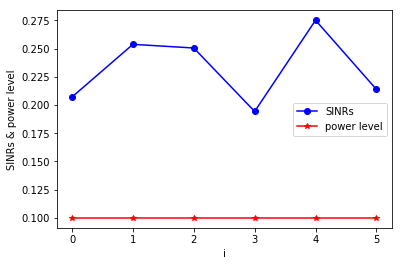

In [37]:
import numpy as np
import cvxpy as cp
def power_control(n,Smin):    
    
    # Declare variables and parameters
    Pmin = 0.1
    Pmax = 5
    p = cp.Variable(shape=n)
    segma = 0.2
    segma_matrix = segma*np.ones(n)    
    
    #generate random matrix G
    G = np.random.uniform(0.1,0.9,n**2)
    G = G.reshape(n,n)
    G[np.diag_indices_from(G)] = 1
    print("the chosen G:",G)       
    
    #G that with diagnol elements all zero
    G[np.diag_indices_from(G)] = 0
    
    #identity matrix
    G1 = np.eye(n)
    
    #objective function.
    obj = cp.Minimize(cp.sum(p))   
    
    # Declare constraints
    constraints = [p <= Pmax ,p >= Pmin, G1@p>=Smin*(segma_matrix+G@p)]
    
    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        #SINRs equation
        SINRs = (G1@p.value)/(segma_matrix+G@p.value)
        return prob.status, prob.value, p.value,SINRs
    else:
        return prob.status, np.nan, np.nan    

np.set_printoptions(precision=3)
Smin = 0
n = 6
stat, prob, x ,SINRs= power_control(n,Smin)
print('min_f(p)= {:.4g} '.format(prob))
print('solution_p=\n{}'.format(x))
print("SINRs:",SINRs)
# plot
from matplotlib.pyplot import figure,plot, show, xlabel, ylabel,legend
figure(); 
plot(SINRs, 'bo-')
plot(x, 'r*-')
legend(labels = ['SINRs', 'power level'], loc = 'best')
xlabel('i'); ylabel('SINRs & power level')
show()

3. (2 pts) What happens if you choose an $S^{min}$ that is larger? Solve the problem again and document your results. What happens if you choose a very large $S^{min}$? Observe and comment.

**Comment:**  From the plots below we can see that, when we choose a larger $S^{min}$, the power level remain the same as lowest bound, but when we keep increase the $S^{min}$, the power levels are increased so that to meet the SINRs constraint and SINRs also hit the boundary. If we keep increase smin, we can't find the solution. We can see that the solution will change as the constraints change and from the lecture's sensitivity theorem we know that the Lagrange multipliers show how the optimal value of objective function due to the constraints change.

Intuitively, $S^{min}$ means the lowest requirement of the system to be able to work properly, higher $S^{min}$ means the system has a higer standard for the received signal because it requires a higher SNR, which means that in order to increase SNR, the transmitted power need to be increased to meet the high SNR requirement. Although we want the total transmission power to be minimal, sometimes it's inevitable to increase the power to adapt to a poor performance system. Besides, when $S^{min}$ is large enough(a system is poor enough), we can't find the optimal solution.

======================When Smin = 0.2===================
the chosen G: [[1.    0.212 0.234 0.894 0.318 0.611]
 [0.489 1.    0.701 0.24  0.736 0.667]
 [0.328 0.406 1.    0.877 0.288 0.326]
 [0.638 0.327 0.497 1.    0.583 0.162]
 [0.209 0.437 0.241 0.427 1.    0.897]
 [0.841 0.396 0.362 0.58  0.789 1.   ]]
min_f(p)= 0.6 
solution_p=
[0.1 0.1 0.1 0.1 0.1 0.1]
SINRs: [0.234 0.207 0.237 0.238 0.237 0.201]
======================When Smin = 0.3===================
the chosen G: [[1.    0.734 0.418 0.672 0.892 0.314]
 [0.228 1.    0.866 0.531 0.537 0.842]
 [0.273 0.503 1.    0.206 0.861 0.155]
 [0.215 0.727 0.666 1.    0.254 0.153]
 [0.848 0.792 0.54  0.659 1.    0.261]
 [0.195 0.889 0.425 0.496 0.779 1.   ]]
min_f(p)= 1.765 
solution_p=
[0.326 0.315 0.248 0.238 0.329 0.307]
SINRs: [0.3 0.3 0.3 0.3 0.3 0.3]


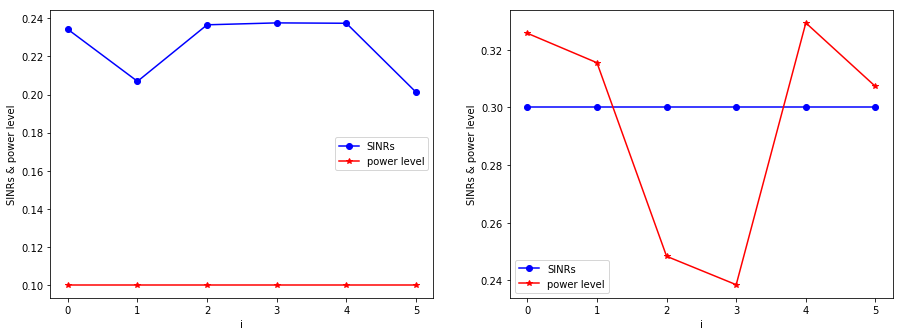

In [38]:
#choose Smin = 0.2
print('======================When Smin = 0.2===================')
stat1, prob1, x1 ,SINRs1= power_control(6,0.2)
print('min_f(p)= {:.4g} '.format(prob1))
print('solution_p=\n{}'.format(x1))
print('SINRs:',SINRs1)
#choose Smin = 0.3
print('======================When Smin = 0.3===================')
stat2, prob2, x2 ,SINRs2= power_control(6,0.3)
print('min_f(p)= {:.4g} '.format(prob2))
print('solution_p=\n{}'.format(x2))
print('SINRs:',SINRs2)
# plot
from matplotlib.pyplot import figure,plot, show, xlabel, ylabel,legend,subplot
figure(figsize=(9,5)); 
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=0.9,wspace=0.2,hspace=0.3)
subplot(121)
plot(SINRs1, 'bo-')
plot(x1, 'r*-')
xlabel('i'); ylabel('SINRs & power level')
legend(labels = ['SINRs', 'power level'], loc = 'best')
subplot(122)
plot(SINRs2, 'bo-')
plot(x2, 'r*-')
legend(labels = ['SINRs', 'power level'], loc = 'best')
xlabel('i'); ylabel('SINRs & power level')
show()

4. (4 pts) Solve the problem using a combination of active set and penalty function methods. Specifically, choose a penalty function to impose the $S^{min}$ constraint and use an active set method for $P^{min}$, $P^{max}$ power constraints. Choose tighter constraints to make the problem more interesting.

When using penalty to analyse $S^{min}$, we set up a new function $T(P)$, let it be 0 when $A.P + S^{min}.\sigma \leq 0$, and no smaller than 0 when $A.P + S^{min}.\sigma > 0$, so we can set the penalty function as: $$T(P) = \sum_{i=1}^Nmax(0,A.P + S^{min}.\sigma)$$
Then with the penalty function we can set up the problem as: $$min_{P}\;\Phi(P,c) = f(P) + cT(P)$$ $$\text{subject to}P^{min} \leq P_i \leq P^{max}, \; \forall i$$and find out $P^*$ where c is a positive, sufficiently large penalty function coefficent. Here we assume c to be 10. For the constraints $P^{min} \leq P_i \leq P^{max}, \; \forall i$. We will use active set to deal with it.
We have to decide a constraint function $G_i(P)$ for each iterative process, and the Lagrangian of the process is:
$$L_i(P,c,\mu)=\Phi(P,c)+\mu^TG_i(P)$$ $$\text{have condition }\nabla_P\Phi(P^*,c)+\mu^T\nabla G_i(P)=0$$, if we get


In [5]:
import cvxpy as cp
import numpy as np
n = 6
p = cp.Variable(shape = n)
P_min = 0.1
P_max = 5
s_min2 = 0.25
G2 = np.random.uniform(0.1,0.9,(6,6))
for i in range(0,6):
    G2[i,i]=0
G1 = np.eye(6)
sigma = 0.2
obj = cp.Minimize(cp.sum(p)+10*cp.sum(cp.pos(s_min2*(sigma + p@G2)-p@G1)))
constraints3 = [p >= P_min,(P_max-p)>=0]
prob3 = cp.Problem(obj,constraints3)
prob3.solve()
if(prob3.status=='optimal'):
    minimize3 = prob3.value
    print(prob3.status, minimize3, p.value)
    k2 = (p.value@G1)/(sigma + p.value@G2)
    #print(k,G2,p.value@G1,p.value@G2)
    print(k2)
else:
    print(prob2.status, np.nan, np.nan)

optimal 0.8375557141189749 [0.14222 0.12358 0.14379 0.14552 0.12696 0.15548]
[0.25 0.25 0.25 0.25 0.25 0.25]


## 3.4 (_Optional_ Bonus, 10 pts) Model Predictive Control

![Control system](img/feedback_control.png)

It is possible to formulate a **discrete-time, finite-horizon optimal-control** as a constrained optimisation problem. This is quite useful since it allows making use of powerful optimisation solvers in addressing the [control problem](https://en.wikipedia.org/wiki/Control_system). This formulation is called Model Predictive Control [(MPC).](https://en.wikipedia.org/wiki/Model_predictive_control) 

Specifically, consider a system with a state vector $x_t\in {\bf R}^n$ that varies over the discrete time steps $t=0,\ldots,T$, and control actions $u_t\in {\bf R}^m$ that affect the state as part of a linear dynamical system formulated as 

$$ x_{t+1} = A x_t + B u_t, $$
where $A \in {\bf R}^{n\times n}$ and $B \in {\bf R}^{n\times m}$ are system matrices.

The goal is to find the optimal actions $u_0,\ldots,u_{T-1}$ over the finite horizon $T$ by solving the optimization problems

\begin{array}{ll} \mbox{minimize} & \sum_{t=0}^{T-1} \ell (x_t,u_t) + \ell_T(x_T)\\
\mbox{subject to} & x_{t+1} = Ax_t + Bu_t\\%, \quad t=0, \ldots, T-1\\
& (x_t,u_t) \in \mathcal C, \quad x_T\in \mathcal C_T,
%, \quad \quad t=0, \ldots, T
\end{array}

where $\ell: {\bf R}^n \times {\bf R}^m\to {\bf R}$ is the stage cost, $\ell_T$ is the terminal cost,
$\mathcal C$ is the state/action constraints, and $\mathcal C_T$ is the terminal constraint.

1. Choose a simple linear dynamical system that you are interested in and formulate its state evolution as $x_{t+1} = A x_t + B u_t$. This can be a very well-known system, you don't need to be original.
2. Define the objective, i.e. ongoing (and if there are terminal) costs imposed on states and control actions (cost of good/bad states, cost of taking a control action). 
3. Solve the problem over a finite horizon. Apply actions to compute and plot the evolution of states.

A recent research paper (which has won the best student paper award) using MPC formulation is [available here (right click to download).](files/MPC_paper.pdf)

### 3.5 (_Optional_  without bonus :) How do optimisation software handle non-standard problems?

_This is just for those of you, who are very interested and have spare time and bored and have nothing else to do!_

Try to solve Question 6 from Module 2, Lesson 2 (Constrained Optimisation) using the software packages (Python ones and Matlab). How do various software packages handle such non-standard situations? Observe and add to your report briefly with a sentence or two.

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!